# import packages

In [1]:
import pandas as pd
from dateutil.parser import parse
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# load data

In [2]:
data=pd.read_excel('ASIANPAINT.xlsx',parse_dates=['Date'])

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-02,256.000000,261.795013,256.000000,259.029999,239.618881,182450.0
1,2012-01-03,260.019989,266.000000,260.015015,265.230011,245.354233,174850.0
2,2012-01-04,261.904999,269.989990,261.904999,267.494995,247.449463,341860.0
3,2012-01-05,267.390015,269.095001,266.000000,267.170013,247.148880,719580.0
4,2012-01-06,264.804993,268.494995,264.510010,266.059998,246.121994,3815540.0


# data cleaning

In [4]:
null_var=[feature for feature in data.columns if data[feature].isnull().sum()>0]

In [5]:
print(null_var)

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


In [6]:
for i in null_var:
    print(i,data[i].isnull().sum())

Open 6
High 6
Low 6
Close 6
Adj Close 6
Volume 6


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2471 entries, 0 to 2470
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2471 non-null   datetime64[ns]
 1   Open       2465 non-null   float64       
 2   High       2465 non-null   float64       
 3   Low        2465 non-null   float64       
 4   Close      2465 non-null   float64       
 5   Adj Close  2465 non-null   float64       
 6   Volume     2465 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 135.3 KB


In [8]:
data.dropna(inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2465 entries, 0 to 2470
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2465 non-null   datetime64[ns]
 1   Open       2465 non-null   float64       
 2   High       2465 non-null   float64       
 3   Low        2465 non-null   float64       
 4   Close      2465 non-null   float64       
 5   Adj Close  2465 non-null   float64       
 6   Volume     2465 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 154.1 KB


In [10]:
data['year']=[d.year for d in data.Date]
data['month']=[d.strftime('%b') for d in data.Date]
year=data.year.unique()

In [11]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month
0,2012-01-02,256.000000,261.795013,256.000000,259.029999,239.618881,182450.0,2012,Jan
1,2012-01-03,260.019989,266.000000,260.015015,265.230011,245.354233,174850.0,2012,Jan
2,2012-01-04,261.904999,269.989990,261.904999,267.494995,247.449463,341860.0,2012,Jan
3,2012-01-05,267.390015,269.095001,266.000000,267.170013,247.148880,719580.0,2012,Jan
4,2012-01-06,264.804993,268.494995,264.510010,266.059998,246.121994,3815540.0,2012,Jan


# basic visualization 

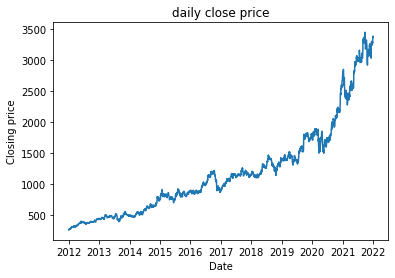

<Figure size 2000x800 with 0 Axes>

In [12]:
plt.plot(data['Date'],data['Close'])
plt.xlabel('Date')
plt.ylabel('Closing price')
plt.title('daily close price')
plt.figure(figsize=(25,10),dpi=80)
plt.show()

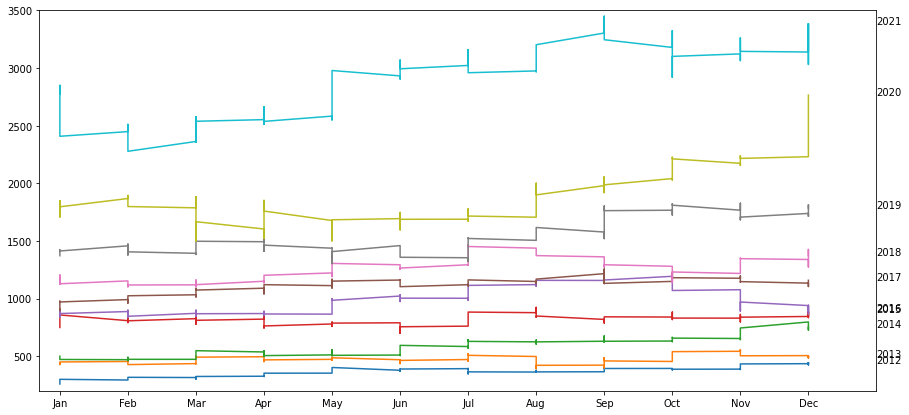

In [75]:
plt.figure(figsize=(15,7))
for i in year:
    
    data1=data.loc[data.year==i]
    plt.plot(data1['month'],data1['Close'])
    plt.gca().set(xlim=(-0.3,12),ylim=(200,3500))
    plt.text(12,data1['Close'][-1:].values[0],i)
plt.show()
    

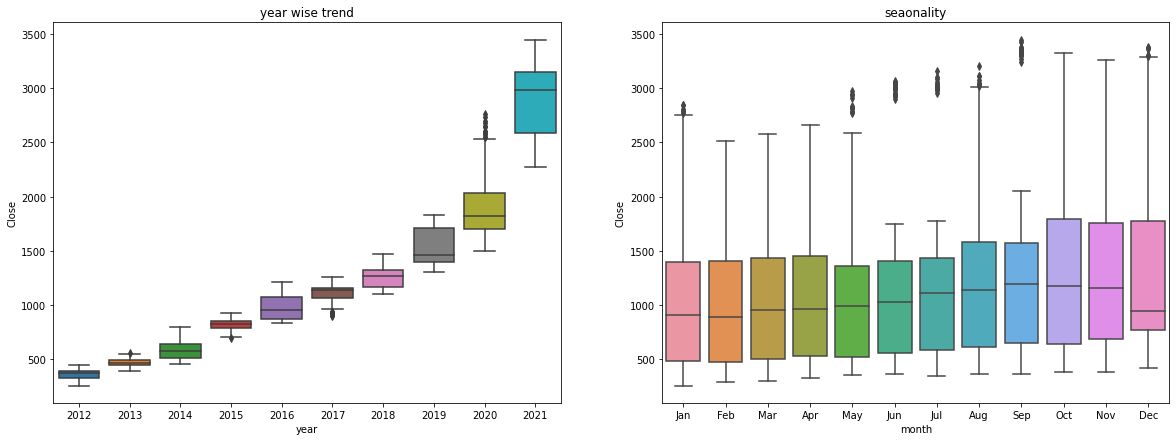

In [72]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.boxplot(x='year',y='Close',data=data) # trend
plt.title('year wise trend')
plt.subplot(1,2,2)
sns.boxplot(x='month',y='Close',data=data) # seaonalilty
plt.title('seaonality')
plt.show()

# Patterns in a time series

### Any time series may be split into the following components: Base Level + Trend + Seasonality + Error 
#### A trend is observed when there is an increasing or decreasing slope observed in the time series.
#### Whereas seasonality is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors. It could be because of the month of the year, the day of the month, weekdays or even time of the day. However, It is not mandatory that all time series must have a trend and/or seasonality.
#### A time series may not have a distinct trend but have a seasonality. The opposite can also be true. So, a time series may be imagined as a combination of the trend, seasonality and the error terms.

## Additive and multiplicative time series

In [76]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [118]:
# multiplicative decomposition
data2=data.copy()
data2.set_index('Date')

result_mul=seasonal_decompose(data2['Close'],model='multiplicative', period=5,extrapolate_trend='freq')
result_add=seasonal_decompose(data2['Close'], period=5,extrapolate_trend='freq')

Text(0.5, 0.98, 'additive decompose')

<Figure size 720x504 with 0 Axes>

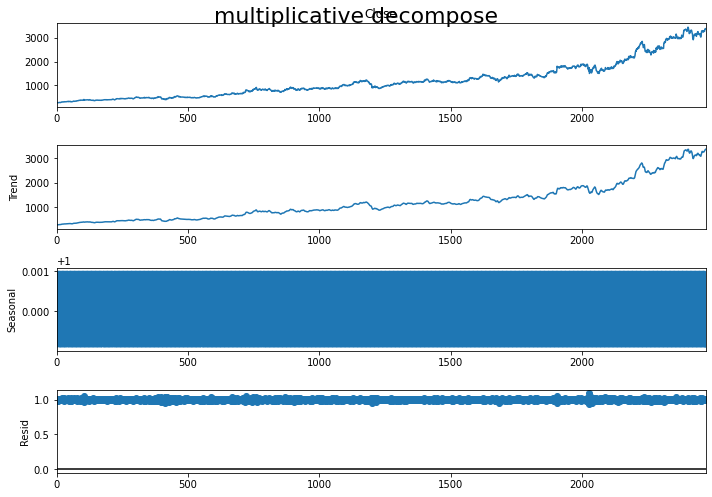

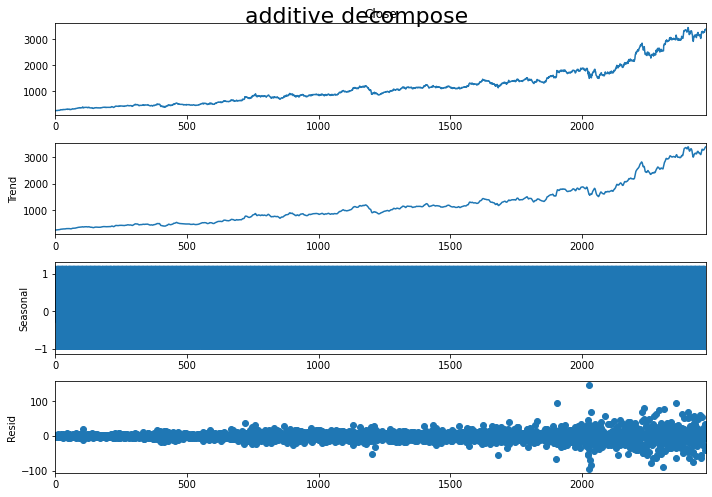

In [119]:
plt.figure(figsize=(10,7))
#plt.subplot(1,2,1)
result_mul.plot().suptitle('multiplicative decompose',fontsize=22)
#plt.subplot(1,2,2)
result_add.plot().suptitle('additive decompose',fontsize=22)

In [120]:
res_mul=pd.concat([result_mul.seasonal,result_mul.trend,result_mul.resid,result_mul.observed],axis=1)
res_mul.columns=['seasonal','trend','resid','observed']

In [121]:
res_mul

,seasonal,trend,resid,observed
0,0.999880,263.445205,0.983358,259.029999
1,1.000993,264.343005,1.002361,265.230011
2,1.000375,264.997003,1.009049,267.494995
3,0.999633,266.706006,1.002108,267.170013
4,0.999120,266.791003,0.998139,266.059998
...,...,...,...,...
2466,0.999880,3312.149951,0.988117,3272.399902
2467,1.000993,3331.709961,1.009950,3368.199951
2468,1.000375,3351.339941,1.004431,3367.449951
2469,0.999633,3361.641914,1.001575,3365.699951


In [122]:
res_add=pd.concat([result_add.seasonal,result_add.trend,result_add.resid,result_add.observed],axis=1)
res_add.columns=['seasonal','trend','resid','observed']

In [123]:
res_add

,seasonal,trend,resid,observed
0,-0.280670,263.445205,-4.134536,259.029999
1,1.203925,264.343005,-0.316919,265.230011
2,0.401741,264.997003,2.096250,267.494995
3,-0.303136,266.706006,0.767144,267.170013
4,-1.021860,266.791003,0.290855,266.059998
...,...,...,...,...
2466,-0.280670,3312.149951,-39.469379,3272.399902
2467,1.203925,3331.709961,35.286065,3368.199951
2468,0.401741,3351.339941,15.708268,3367.449951
2469,-0.303136,3361.641914,4.361174,3365.699951


# Stationary and Non-Stationary Time Series
## Stationarity is a property of a time series. A stationary series is one where the values of the series is not a function of time. 

## Unit Root tests like:

- Augmented Dickey Fuller test (ADH Test)
- Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)
- Philips Perron test (PP Test)

In [124]:
from statsmodels.tsa.stattools import adfuller, kpss

In [127]:
adf_res=adfuller(data.Close.values)
kpss_res=kpss(data.Close.values)

c:\users\revei\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
c:\users\revei\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [126]:
print(adf_res)

(2.0219553681845444, 0.9987008094961349, 20, 2444, {'1%': -3.4330284703548064, '5%': -2.86272332205779, '10%': -2.5673999301740325}, 22336.33735541471)


In [130]:
print(kpss_res)

(7.480557458727152, 0.01, 27, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


# Granger Causality test to know if one time series is helpful in forecasting another?

In [154]:
from statsmodels.tsa.stattools import grangercausalitytests
import datetime
data['months']=data.Date.dt.month

In [155]:
test_res=grangercausalitytests(data[['Close','months']],maxlag=2) # if p>0.05 not suitable for forcasting


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2874  , p=0.2566  , df_denom=2461, df_num=1
ssr based chi2 test:   chi2=1.2890  , p=0.2562  , df=1
likelihood ratio test: chi2=1.2886  , p=0.2563  , df=1
parameter F test:         F=1.2874  , p=0.2566  , df_denom=2461, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7140  , p=0.4898  , df_denom=2458, df_num=2
ssr based chi2 test:   chi2=1.4310  , p=0.4890  , df=2
likelihood ratio test: chi2=1.4305  , p=0.4891  , df=2
parameter F test:         F=0.7140  , p=0.4898  , df_denom=2458, df_num=2


In [156]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,months
0,2012-01-02,256.000000,261.795013,256.000000,259.029999,239.618881,182450.0,2012,Jan,1
1,2012-01-03,260.019989,266.000000,260.015015,265.230011,245.354233,174850.0,2012,Jan,1
2,2012-01-04,261.904999,269.989990,261.904999,267.494995,247.449463,341860.0,2012,Jan,1
3,2012-01-05,267.390015,269.095001,266.000000,267.170013,247.148880,719580.0,2012,Jan,1
4,2012-01-06,264.804993,268.494995,264.510010,266.059998,246.121994,3815540.0,2012,Jan,1
...,...,...,...,...,...,...,...,...,...,...
2466,2021-12-27,3280.100098,3284.750000,3226.199951,3272.399902,3272.399902,640701.0,2021,Dec,12
2467,2021-12-28,3275.949951,3375.000000,3273.000000,3368.199951,3368.199951,1211648.0,2021,Dec,12
2468,2021-12-29,3372.199951,3386.000000,3346.199951,3367.449951,3367.449951,598421.0,2021,Dec,12
2469,2021-12-30,3363.250000,3390.000000,3350.300049,3365.699951,3365.699951,691223.0,2021,Dec,12
